# David Santiago Buitrago Prada
## Proyecto Regresión, Screentime vs Mentalwellness
###5/9/2025



# Hipótesis

Pasar tiempo excesivo en pantallas impacta negativamente en la percepción de estrés. Encuesta realizada a 400 personas.

# Supuestos

No hay correlación multilineal entre las variables independientes.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adharshinikumar/screentime-vs-mentalwellness-survey-2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'screentime-vs-mentalwellness-survey-2025' dataset.
Path to dataset files: /kaggle/input/screentime-vs-mentalwellness-survey-2025


In [ ]:
import pandas as pd
import os

# List files in the dataset directory to find the CSV file
files = os.listdir(path)
csv_file = None
for file in files:
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    df = pd.read_csv(csv_file)
    df = df.drop(['Unnamed: 15', 'user_id'], axis = 1)
else:
    print("No CSV file found in the dataset directory.")


In [ ]:
df.head()

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


# Preprocessing

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
work_mode,0
screen_time_hours,0
work_screen_hours,0
leisure_screen_hours,0
sleep_hours,0
sleep_quality_1_5,0
stress_level_0_10,0


# Task
Perform a descriptive analysis of the dataset stored in the dataframe `df`, including univariate analysis of categorical and numerical variables with frequency plots and boxplots, and bivariate analysis of numerical variables with scatter plots, correlations, and covariances.

## Análisis univariado - variables categóricas

### Subtask:
Identificar las variables categóricas en el DataFrame `df`, calcular sus frecuencias y proporciones, y visualizar su distribución con gráficos de barras o de pastel.


**Reasoning**:
Identify categorical columns, calculate frequencies and proportions, and prepare for plotting.



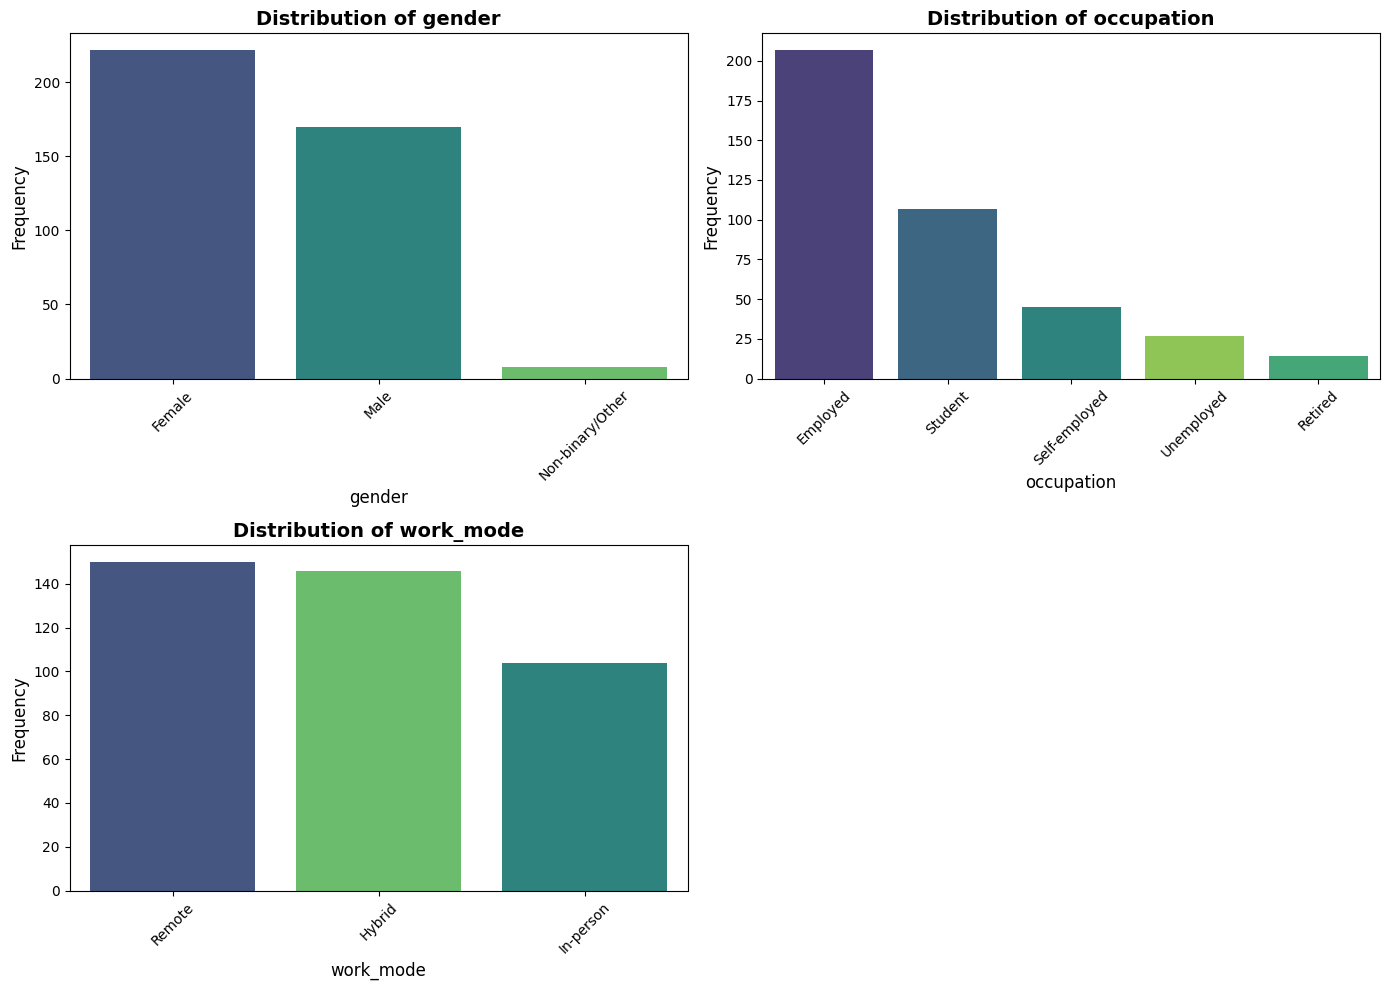

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Número de columnas categóricas
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=col,              # asignamos hue igual al x
        palette='viridis',
        order=df[col].value_counts().index,
        legend=False,         # quitamos la leyenda innecesaria
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## Análisis univariado - variables numéricas

### Subtask:
Identificar las variables numéricas en el DataFrame `df`, calcular estadísticas descriptivas y crear histogramas y boxplots para visualizar su distribución y detectar valores atípicos.


**Reasoning**:
Identify numerical columns, calculate descriptive statistics, and create histograms and boxplots for each numerical variable to visualize distribution and detect outliers.



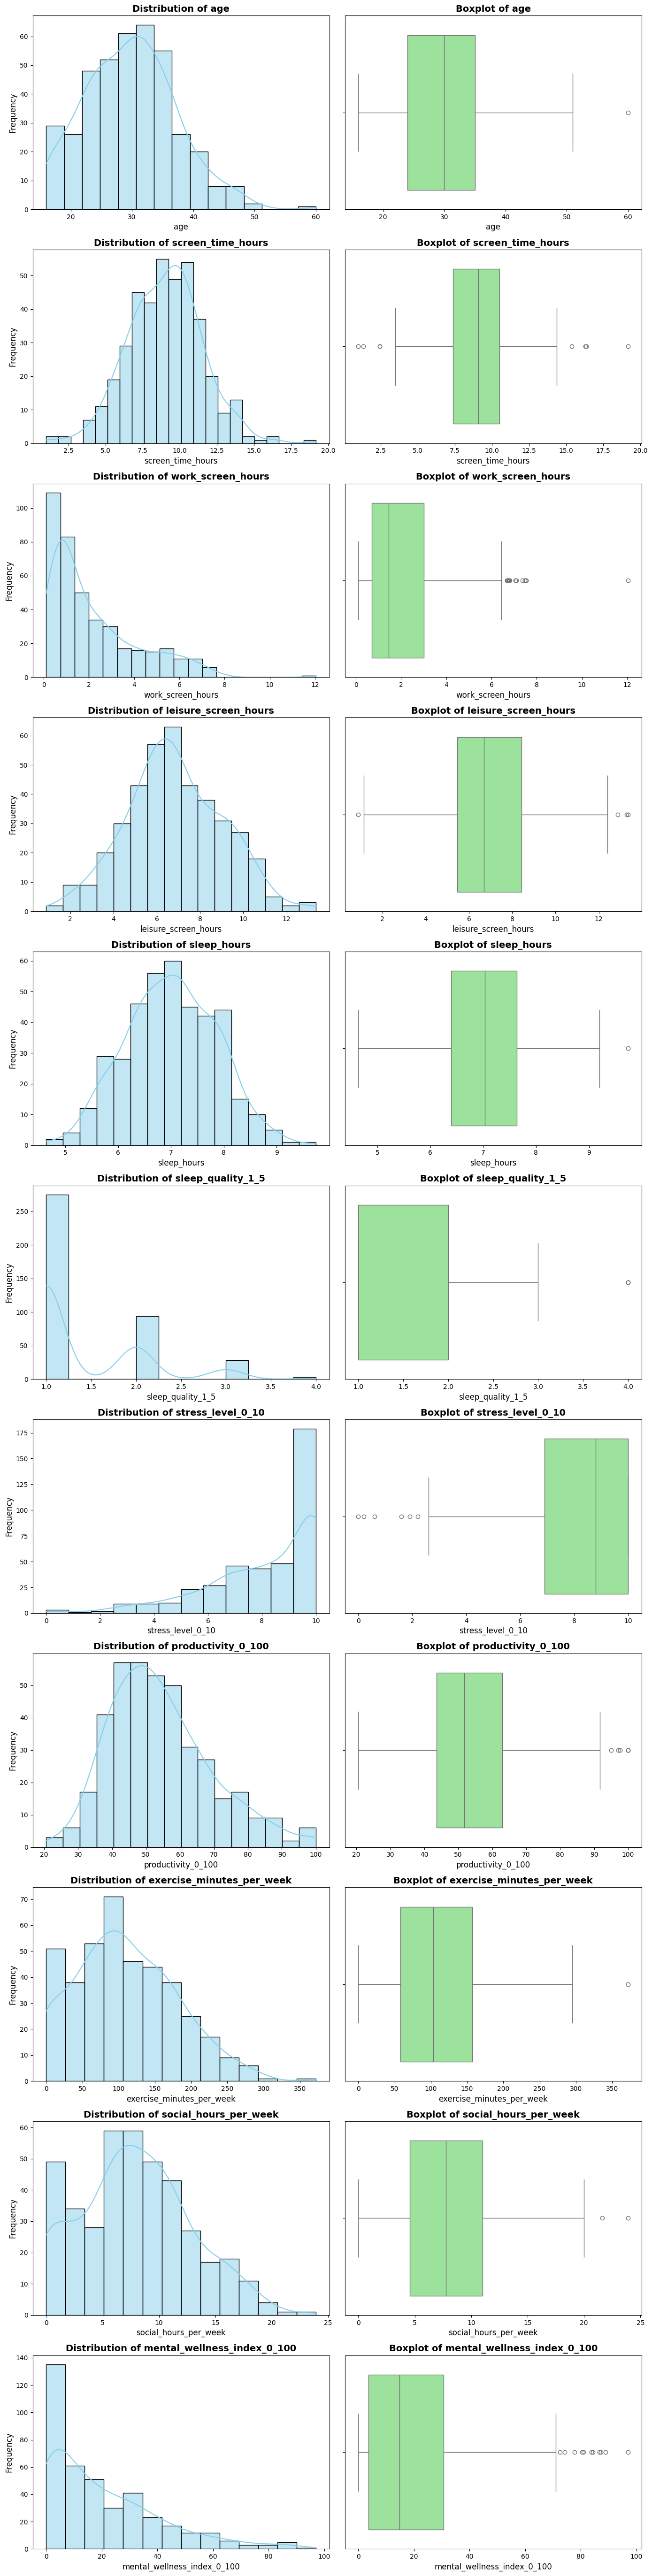

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2  # columnas del grid
n_rows = len(numerical_cols)  # una fila por variable, con hist y boxplot

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    # Histograma con KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14, fontweight="bold")
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel("Frequency", fontsize=12)

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f'Boxplot of {col}', fontsize=14, fontweight="bold")
    axes[i, 1].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


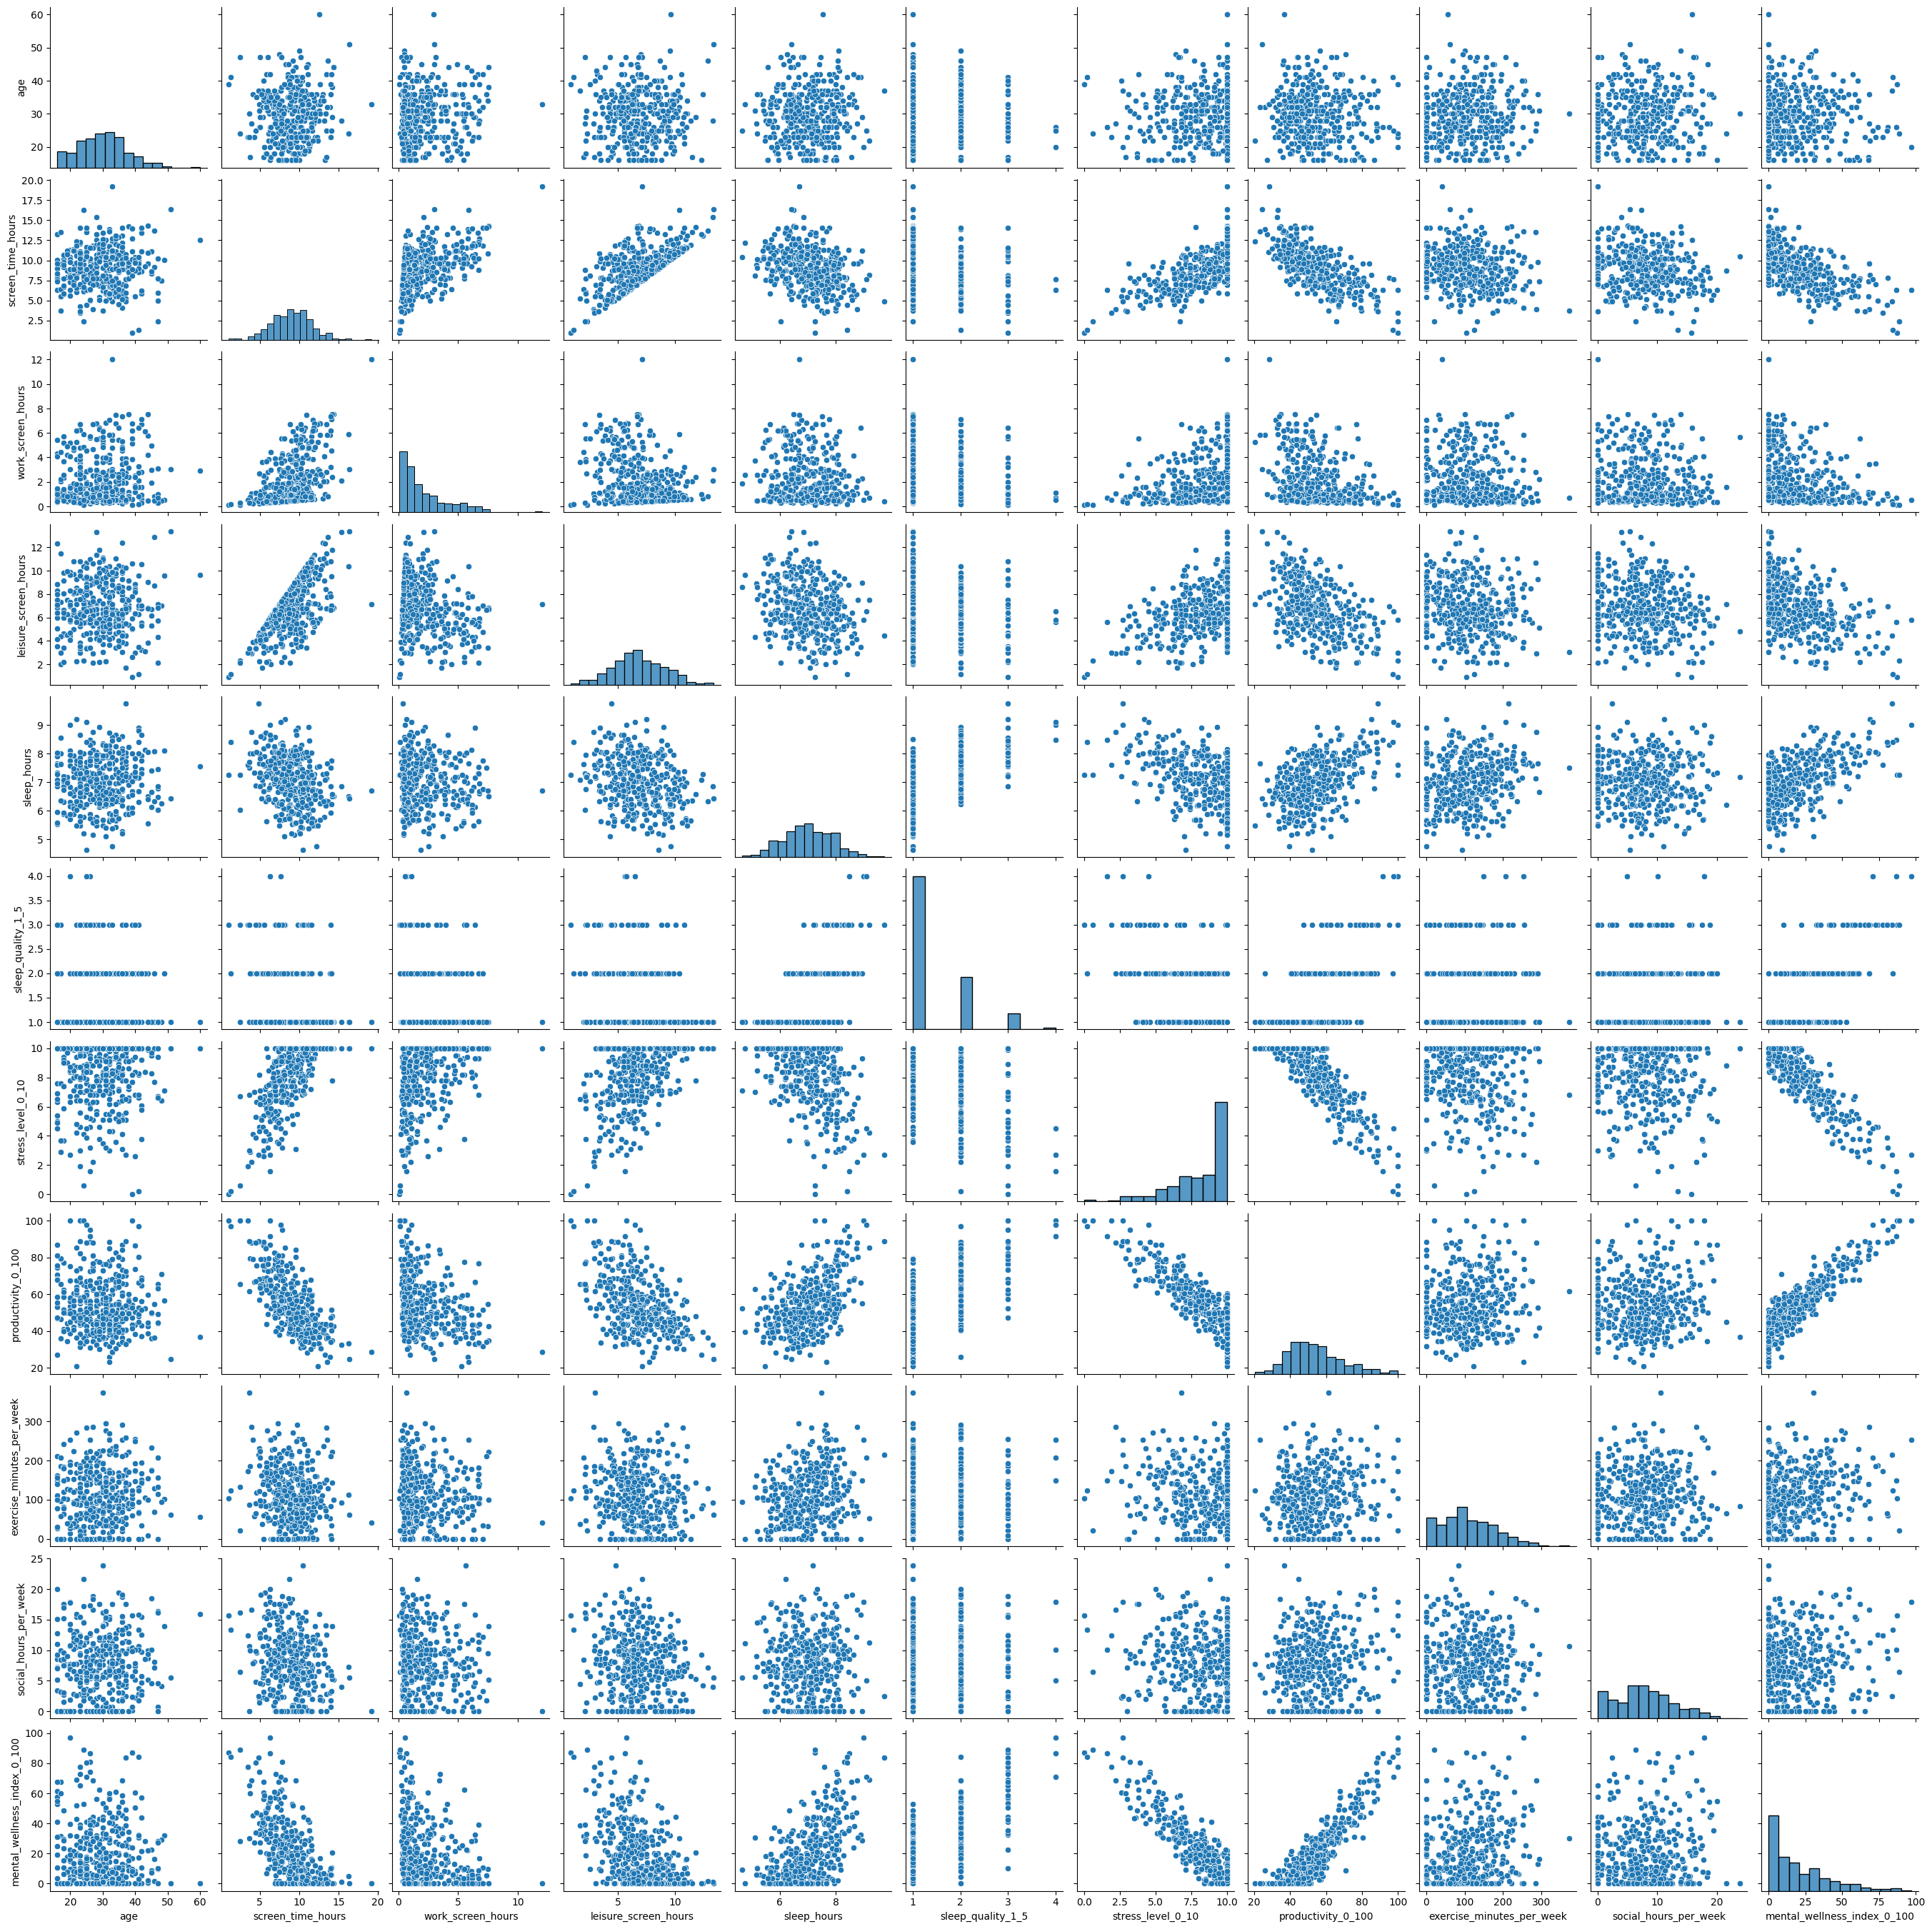

In [ ]:
sns.pairplot(df[numerical_cols])

<Axes: >

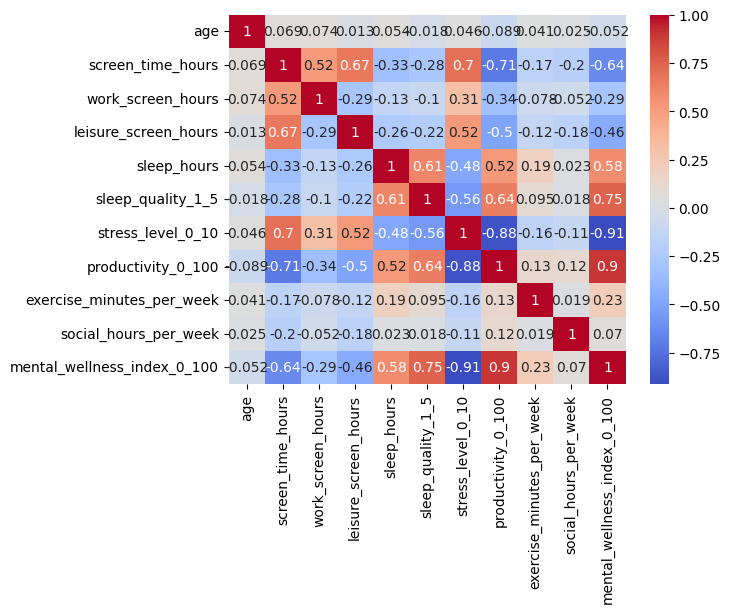

In [ ]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Estandarización

<Axes: >

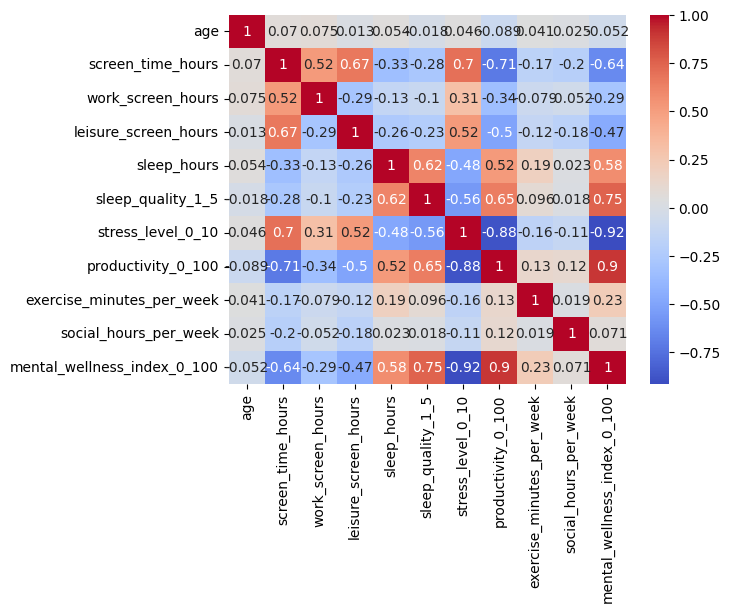

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

cov_scaled = df_scaled[numerical_cols].cov()
sns.heatmap(cov_scaled, annot=True, cmap="coolwarm")

# Modelos de ensamble, regresión (RF, XGBoost)

# Task
Train Random Forest and XGBoost models using grid search and save the metrics.

## Prepare data for modeling

### Subtask:
Separate the features (X) and the target variable (y), and split the data into training and testing sets.


**Reasoning**:
Separate features and target, then split the data into training and testing sets as instructed.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('stress_level_0_10', axis=1)
y = df_scaled['stress_level_0_10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define models

### Subtask:
Initialize the Random Forest Regressor and XGBoost Regressor models.


**Reasoning**:
Initialize the Random Forest Regressor and XGBoost Regressor models.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

## Define hyperparameter grids for grid search

### Subtask:
Specify the ranges of hyperparameters to search for both models.


**Reasoning**:
Specify the hyperparameter grids for Random Forest and XGBoost models.



In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

## Perform grid search for random forest

### Subtask:
Train the Random Forest model using Grid Search with cross-validation to find the best hyperparameters.


**Reasoning**:
Train the Random Forest model using Grid Search with cross-validation to find the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_encoded, y_train)

best_rf_model = grid_search_rf.best_estimator_

## Evaluate random forest

### Subtask:
Evaluate the performance of the best Random Forest model on the test set and calculate relevant regression metrics (e.g., R-squared, Mean Squared Error, Mean Absolute Error).


**Reasoning**:
Evaluate the performance of the best Random Forest model on the test set by making predictions and calculating R-squared, MSE, and MAE.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_rf = best_rf_model.predict(X_test_encoded)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rf_metrics = {
    'R-squared': r2_rf,
    'Mean Squared Error (MSE)': mse_rf,
    'Mean Absolute Error (MAE)': mae_rf
}

print("Random Forest Model Performance Metrics:")
print(rf_metrics)

Random Forest Model Performance Metrics:
{'R-squared': 0.819769510528379, 'Mean Squared Error (MSE)': 0.17172313762890865, 'Mean Absolute Error (MAE)': 0.3208580458006068}


## Perform grid search for xgboost

### Subtask:
Train the XGBoost model using Grid Search with cross-validation to find the best hyperparameters.


**Reasoning**:
Train the XGBoost model using Grid Search with cross-validation to find the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_encoded, y_train)

best_xgb_model = grid_search_xgb.best_estimator_

## Evaluate xgboost

### Subtask:
Evaluate the performance of the best XGBoost model on the test set and calculate relevant regression metrics.


**Reasoning**:
Evaluate the best XGBoost model on the test set by making predictions and calculating R-squared, MSE, and MAE.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_xgb = best_xgb_model.predict(X_test_encoded)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

xgb_metrics = {
    'R-squared': r2_xgb,
    'Mean Squared Error (MSE)': mse_xgb,
    'Mean Absolute Error (MAE)': mae_xgb
}

print("XGBoost Model Performance Metrics:")
print(xgb_metrics)

XGBoost Model Performance Metrics:
{'R-squared': 0.8375449294344335, 'Mean Squared Error (MSE)': 0.15478676511965833, 'Mean Absolute Error (MAE)': 0.31083561574766067}


## Store metrics

### Subtask:
Store the evaluation metrics for both models in a dictionary or a pandas DataFrame for comparison.


**Reasoning**:
Store the evaluation metrics for both models in a dictionary and then convert it to a pandas DataFrame for display.



In [ ]:
all_model_metrics = {}

all_model_metrics['Random Forest'] = rf_metrics
all_model_metrics['XGBoost'] = xgb_metrics

metrics_df = pd.DataFrame(all_model_metrics)
display(metrics_df)

,Random Forest,XGBoost
R-squared,0.819770,0.837545
Mean Squared Error (MSE),0.171723,0.154787
Mean Absolute Error (MAE),0.320858,0.310836


## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved an R-squared score of approximately 0.82, a Mean Squared Error (MSE) of around 0.17, and a Mean Absolute Error (MAE) of about 0.32 on the test set.
*   The XGBoost model performed slightly better, with an R-squared score of approximately 0.838, an MSE of around 0.155, and an MAE of about 0.311 on the test set.
*   Both models demonstrate good performance in predicting the target variable, with XGBoost showing slightly better results across the evaluated metrics.

### Insights or Next Steps

*   The performance metrics indicate that both Random Forest and XGBoost are suitable models for this regression task, with XGBoost having a slight edge.
*   Further analysis could involve comparing the feature importance from both models to understand which features are most influential in predicting the stress level.
